# Illustrating random walks

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
nsteps = 1000
draws = np.random.randint(0,2,nsteps) # generate 1000 random integer 0 and 1
steps = np.where(draws >0,1,-1) # If draw equal 1, assign value 1, otherwise -1
walk = steps.cumsum() # Position at a point in time

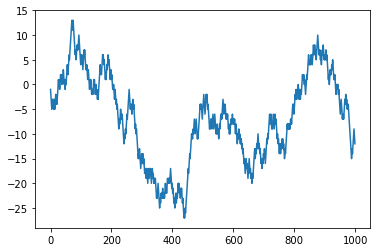

In [8]:
plt.plot(walk)
plt.show()

In [13]:
# In some cases, we want to find out the step it takes to cross certain value (both positive and negative)
# i.e it takes 200 steps to go below 10
# To find the number of step, use argmax()
(walk < -10).argmax() # It takes 240 steps to go below -10

240

In [14]:
# Other time, we only care if the walk has traveled some distance, regardless of positive or negative
# We use np.abs 
(np.abs(walk) > 20).argmax() # Look at the graph, 340 steps is below -20

346

## Similuating many random walks at once

In [16]:
# Simulate two random walks
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0,2,size=(nwalks,nsteps)) # random 0 and 1 with 5000 x 1000
draws

array([[1, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 0, 0]])

In [28]:
steps = np.where(draws >0,1,-1)
steps

array([[ 1, -1,  1, ..., -1, -1,  1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1, -1,  1],
       ...,
       [-1,  1, -1, ...,  1, -1,  1],
       [ 1,  1,  1, ..., -1,  1,  1],
       [ 1,  1, -1, ..., -1, -1, -1]])

In [29]:
walks = steps.cumsum(1) # Horizontally
walks

array([[  1,   0,   1, ..., -34, -35, -34],
       [ -1,   0,   1, ...,  30,  31,  30],
       [ -1,  -2,  -3, ..., -14, -15, -14],
       ...,
       [ -1,   0,  -1, ...,   6,   5,   6],
       [  1,   2,   3, ...,  40,  41,  42],
       [  1,   2,   1, ...,   8,   7,   6]])

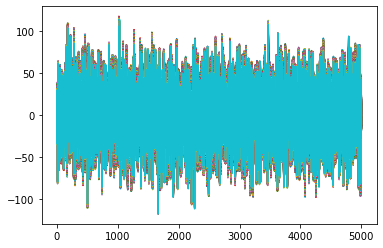

In [31]:
plt.plot(walks)
plt.show()

In [6]:
stockdf = yf.Ticker('TSLA')
tslaData = stockdf.history(period='2y')
tslaData.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-06,680.760010,681.020020,650.000000,663.539978,27784600,0,0.0
2021-05-07,665.799988,690.000000,660.219971,672.369995,23422100,0,0.0
2021-05-10,664.900024,665.049988,627.609985,629.039978,31392400,0,0.0
2021-05-11,599.239990,627.099976,595.599976,617.200012,46437200,0,0.0
2021-05-12,602.489990,620.409973,586.765015,589.890015,32974722,0,0.0


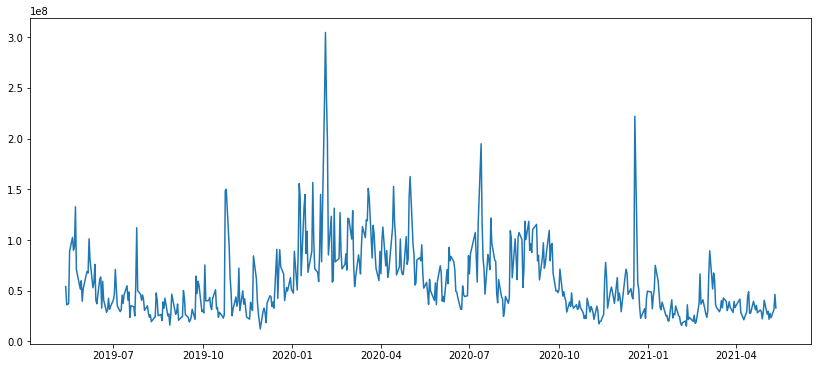

In [19]:
# Plot Tsla Volume 
plt.figure(figsize=(14,6))
plt.plot(tslaData.Volume)
plt.show()

In [16]:
# Days where Volume is higher than average
Vol_mean = tslaData['Volume'].mean()
high_volume = tslaData[tslaData.Volume > Vol_mean]
high_volume

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-17,44.391998,44.448002,41.784000,42.206001,88933500,0,0.0
2019-05-20,40.560001,41.200001,39.049999,41.071999,102631000,0,0.0
2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
...,...,...,...,...,...,...,...
2021-02-23,662.130005,713.609985,619.000000,698.840027,66606900,0,0.0
2021-03-04,655.799988,668.450012,600.000000,621.440002,65919500,0,0.0
2021-03-05,626.059998,627.840027,539.489990,597.950012,89396500,0,0.0


58361282.61782178

In [ ]:
# Linear regression line

def lineFit(x,y):
    xavg = x.mean()
    slope = ((y * (x - xavg)).sum()) / ((x * (x - xavg)).sum())
    yint = y.mean() - slope * xavg
    return slope,yint